In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
   creating: dataset/
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/train/
   creating: dataset/val/
   creating: dataset/train/유아인/
  inflating: __MACOSX/dataset/train/._유아인  
  inflating: dataset/train/.DS_Store  
  inflating: __MACOSX/dataset/train/._.DS_Store  
   creating: dataset/train/마동석/
  inflating: __MACOSX/dataset/train/._마동석  
   creating: dataset/train/배수지/
  inflating: __MACOSX/dataset/train/._배수지  
   creating: dataset/train/강동원/
  inflating: __MACOSX/dataset/train/._강동원  
   creating: dataset/train/송혜교/
  inflating: __MACOSX/dataset/train/._송혜교  
   creating: dataset/train/고수/
  inflating: __MACOSX/dataset/train/._고수  
   creating: dataset/val/유아인/
  inflating: __MACOSX/dataset/val/._유아인  
  inflating: dataset/val/.DS_Store   
  inflating: __MACOSX/dataset/val/._.DS_Store  
   creating: dataset/val/마동석/
  inf

In [3]:
import os

In [4]:
#name_list = ['강동원','고수','마동석','배수지','송혜교','유아인']

In [5]:
#def img_os(name):
#  frog_dir = os.path.abspath(f'/content/{name}_cv')
#  filenames = os.listdir(frog_dir)
#  return frog_dir, filenames

In [6]:
#for x in name_list:
#  dir, filen = img_os(x)
#  print(f'{x}_____{dir}_____{len(filen)}개')


In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
data_generator = ImageDataGenerator(rescale = 1./255)

train_generator = data_generator.flow_from_directory(
    '/content/dataset/train',
    target_size=(100,100),
    class_mode = 'categorical',
    batch_size = 4
)

val_generator = data_generator.flow_from_directory(
    '/content/dataset/val',
    target_size=(100,100),
    class_mode = 'categorical',
    batch_size = 4
)

Found 415 images belonging to 6 classes.
Found 78 images belonging to 6 classes.


In [10]:
train_generator.class_indices

{'강동원': 0,
 '고수': 1,
 '마동석': 2,
 '배수지': 3,
 '송혜교': 4,
 '유아인': 5}

In [11]:
val_generator.class_indices

{'강동원': 0,
 '고수': 1,
 '마동석': 2,
 '배수지': 3,
 '송혜교': 4,
 '유아인': 5}

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 128)       0

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=val_generator
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
20/20 [==============================] - 10s 448ms/step - loss: 2.4412 - accuracy: 0.1392 - val_loss: 1.7910 - val_accuracy: 0.2051
Epoch 2/50
20/20 [==============================] - 9s 433ms/step - loss: 1.7945 - accuracy: 0.2250 - val_loss: 1.7900 - val_accuracy: 0.1667
Epoch 3/50
20/20 [==============================] - 9s 438ms/step - loss: 1.7837 - accuracy: 0.2625 - val_loss: 1.7843 - val_accuracy: 0.2564
Epoch 4/50
20/20 [==============================] - 9s 435ms/step - loss: 1.7703 - accuracy: 0.2875 - val_loss: 1.7608 - val_accuracy: 0.3462
Epoch 5/50
20/20 [==============================] - 9s 436ms/step - loss: 1.7248 - accuracy: 0.3750 - val_loss: 1.6763 - val_accuracy: 0.3077
Epoch 6/50
20/20 [==============================] - 8s 429ms/step - loss: 1.5368 - accuracy: 0.4177 - val_loss: 1.5692 - val_accuracy: 0.4231
Epoch 7/50
20/20 [==============================] - 9s 428ms/step - loss: 1.4635 - accuracy: 0.3875 - val_loss: 1.5192 - val_accuracy: 0.4103
Epoch

In [17]:
scores = model.evaluate_generator(val_generator)
print(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.7950142621994019, 0.6153846383094788]


In [18]:
trainDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

In [19]:
trainGenSet = trainDataGen.flow_from_directory(
   '/content/dataset/train',
    batch_size=4,
    target_size=(100,100),
    class_mode='categorical'
)

Found 415 images belonging to 6 classes.


In [20]:
testDataGen = ImageDataGenerator(rescale=1./255)

In [21]:
testGenSet = testDataGen.flow_from_directory(
    '/content/dataset/val',
    target_size=(100,100),
    batch_size=4,
    class_mode='categorical'
)

Found 78 images belonging to 6 classes.


In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 128)      

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


20/20 [==============================] - 10s 450ms/step - loss: 3.0134 - accuracy: 0.1625 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/50
20/20 [==============================] - 9s 433ms/step - loss: 1.7982 - accuracy: 0.1899 - val_loss: 1.7912 - val_accuracy: 0.2179
Epoch 3/50
20/20 [==============================] - 9s 439ms/step - loss: 1.7882 - accuracy: 0.2500 - val_loss: 1.7898 - val_accuracy: 0.1667
Epoch 4/50
20/20 [==============================] - 9s 433ms/step - loss: 1.7795 - accuracy: 0.2750 - val_loss: 1.7785 - val_accuracy: 0.1667
Epoch 5/50
20/20 [==============================] - 9s 436ms/step - loss: 1.7508 - accuracy: 0.2750 - val_loss: 1.7329 - val_accuracy: 0.3846
Epoch 6/50
20/20 [==============================] - 9s 431ms/step - loss: 1.6365 - accuracy: 0.4500 - val_loss: 1.5803 - val_accuracy: 0.3462
Epoch 7/50
20/20 [==============================] - 9s 445ms/step - loss: 1.3966 - accuracy: 0.5000 - val_loss: 1.3700 - val_accuracy: 0.4103
Epoch 8/50
20/20

In [45]:
scores = model.evaluate_generator(val_generator)
print(scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.6519198417663574, 0.6153846383094788]


In [26]:
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [27]:
trainGenSet.class_indices

{'강동원': 0,
 '고수': 1,
 '마동석': 2,
 '배수지': 3,
 '송혜교': 4,
 '유아인': 5}

In [28]:
testGenSet.filenames

['강동원/10resize.jpg',
 '강동원/11resize.jpg',
 '강동원/12resize.jpg',
 '강동원/13resize.jpg',
 '강동원/1resize.jpg',
 '강동원/2resize.jpg',
 '강동원/3resize.jpg',
 '강동원/4resize.jpg',
 '강동원/5resize.jpg',
 '강동원/6resize.jpg',
 '강동원/7resize.jpg',
 '강동원/8resize.jpg',
 '강동원/9resize.jpg',
 '고수/10resize.jpg',
 '고수/11resize.jpg',
 '고수/12resize.jpg',
 '고수/13resize.jpg',
 '고수/14resize.jpg',
 '고수/15resize.jpg',
 '고수/1resize.jpg',
 '고수/2resize.jpg',
 '고수/3resize.jpg',
 '고수/4resize.jpg',
 '고수/6resize.jpg',
 '고수/7resize.jpg',
 '고수/9resize.jpg',
 '마동석/10resize.jpg',
 '마동석/11resize.jpg',
 '마동석/12resize.jpg',
 '마동석/13resize.jpg',
 '마동석/1resize.jpg',
 '마동석/2resize.jpg',
 '마동석/3resize.jpg',
 '마동석/4resize.jpg',
 '마동석/5resize.jpg',
 '마동석/6resize.jpg',
 '마동석/7resize.jpg',
 '마동석/8resize.jpg',
 '마동석/9resize.jpg',
 '배수지/10resize.jpg',
 '배수지/11resize.jpg',
 '

In [29]:
class_names = ['강동원', '고수', '마동석', '배수지', '송혜교', '유아인']

In [30]:
img_data = image.load_img('/content/dataset/val/강동원/8resize.jpg', target_size=(100,100))
img = np.asarray(image.img_to_array(img_data))
img = img/255.

imgs = np.expand_dims(img, axis=0)
imgs.shape

(1, 100, 100, 3)

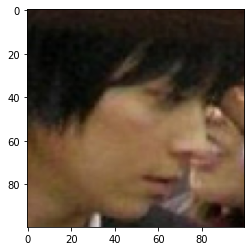

In [31]:
plt.imshow(img)
plt.show()

In [32]:
y_preds = model.predict(imgs)

In [33]:
print(np.argmax(y_preds[0]))
y_preds


0


array([[9.86131668e-01, 6.43075677e-04, 1.09954075e-04, 6.85603358e-03,
        6.19335193e-03, 6.61117301e-05]], dtype=float32)

In [43]:
class_names = ['강동원', '고수', '마동석', '배수지', '송혜교', '유아인']

def predic(name):
  ls = testGenSet.filenames     #테스트 이미지 목록
  list_ = []
  for x in ls:
    if x.split('/')[0] == name:         #전체 목록중 원하는 이름만
      list_.append(x)
  for x in ls:
    img_data = image.load_img(f'/content/dataset/val/{x}', target_size=(100,100))
    img = np.asarray(image.img_to_array(img_data))
    img = img/255.                                                                #이미지 로드후 정규화

    imgs = np.expand_dims(img, axis=0)                     #모델에 예측할려고 차원수 늘림
    
    plt.imshow(img)
    plt.show()                     #이미지 출력

    y_preds = model.predict(imgs)    #모델 predict
    a = np.argmax(y_preds[0])

    print(class_names[a])







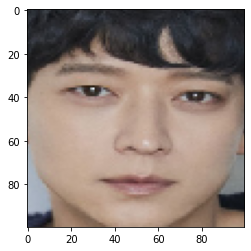

강동원


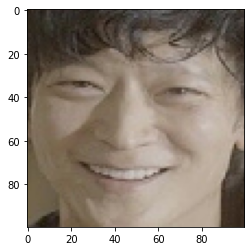

강동원


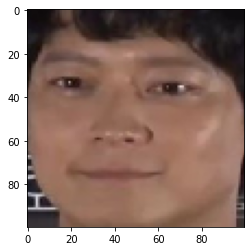

강동원


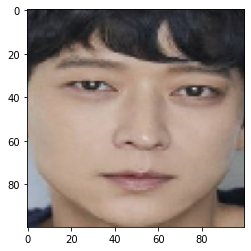

강동원


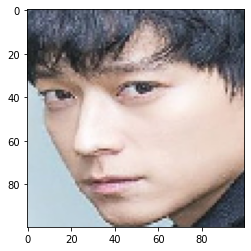

강동원


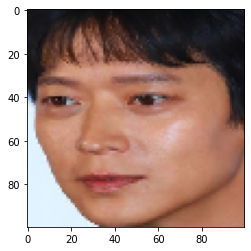

강동원


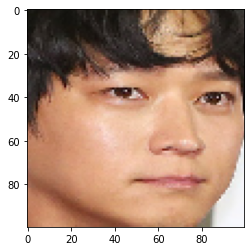

강동원


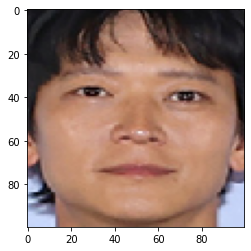

강동원


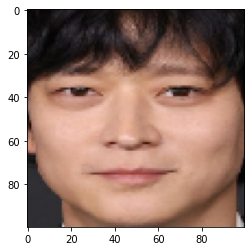

강동원


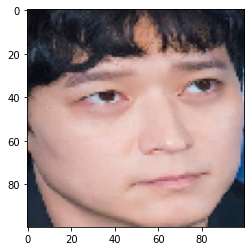

강동원


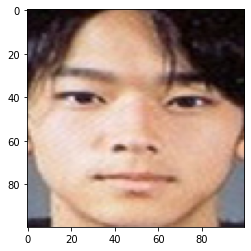

송혜교


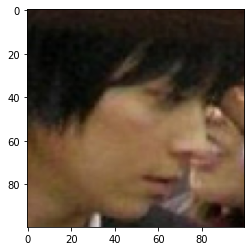

강동원


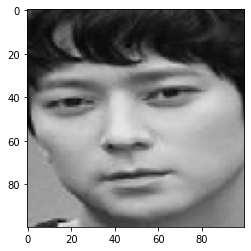

강동원


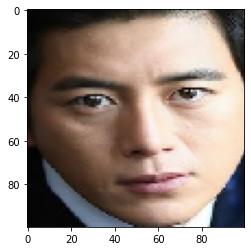

고수


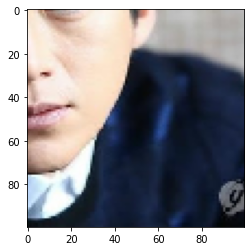

마동석


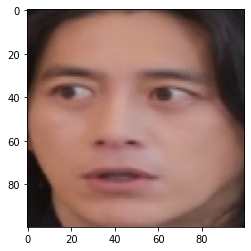

고수


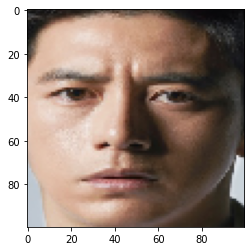

유아인


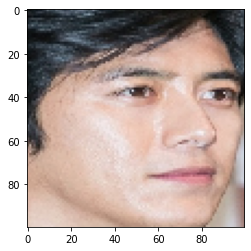

강동원


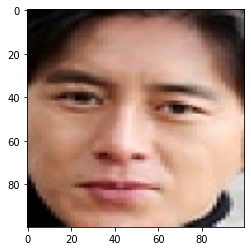

고수


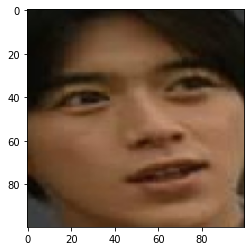

고수


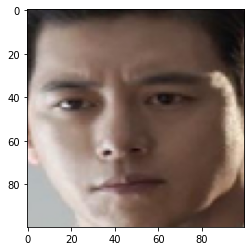

고수


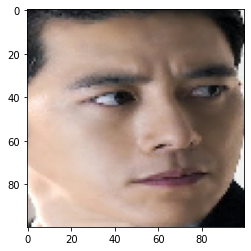

마동석


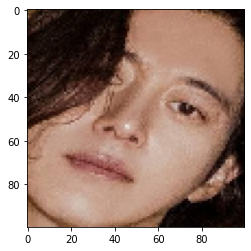

고수


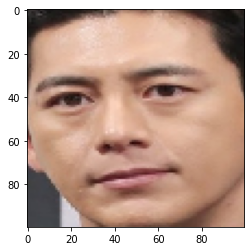

고수


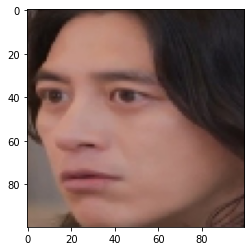

유아인


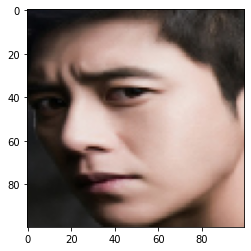

송혜교


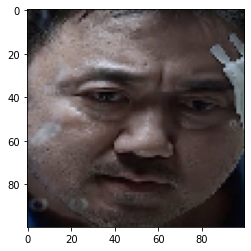

마동석


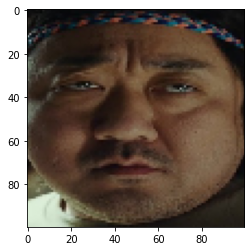

마동석


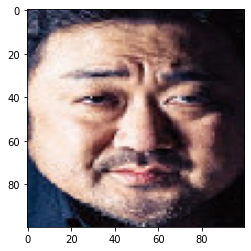

마동석


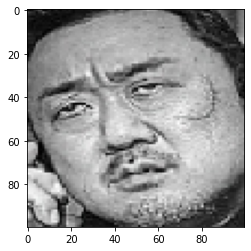

마동석


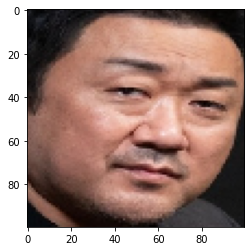

마동석


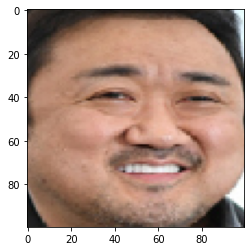

마동석


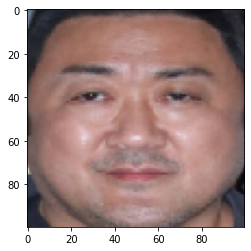

마동석


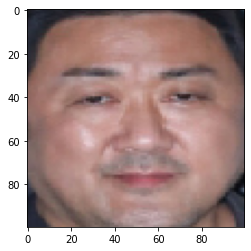

마동석


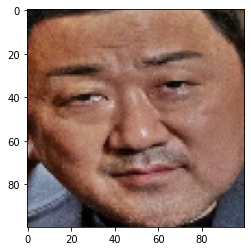

마동석


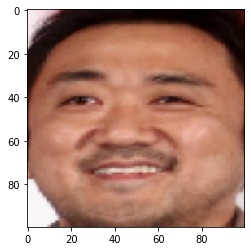

마동석


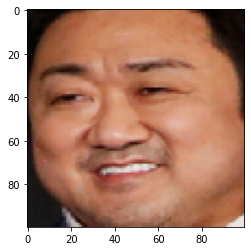

마동석


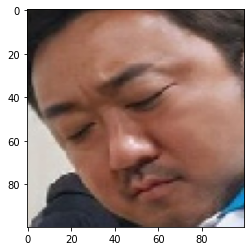

마동석


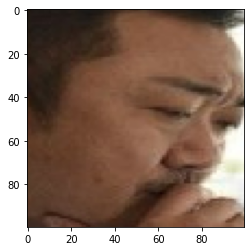

마동석


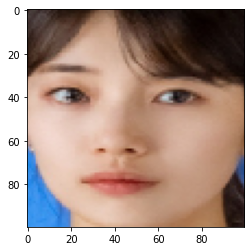

강동원


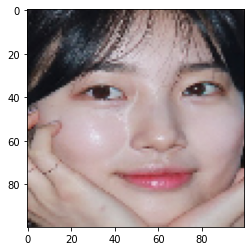

강동원


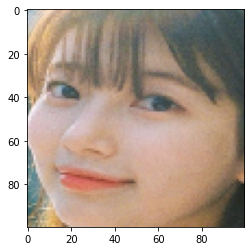

송혜교


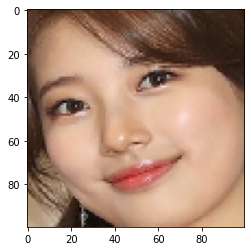

송혜교


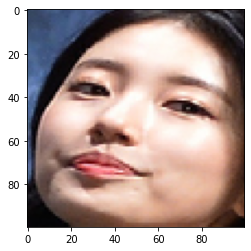

송혜교


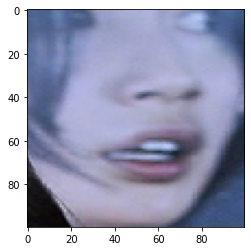

마동석


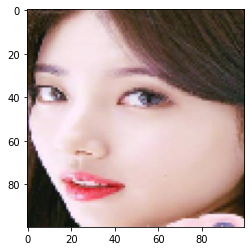

배수지


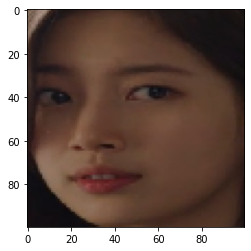

배수지


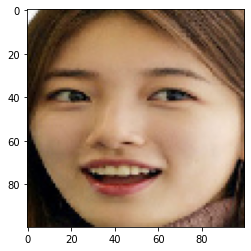

배수지


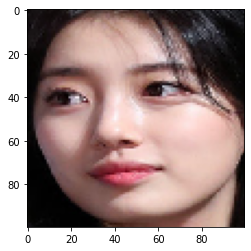

배수지


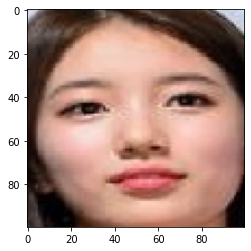

배수지


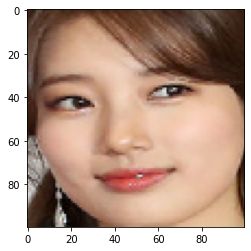

송혜교


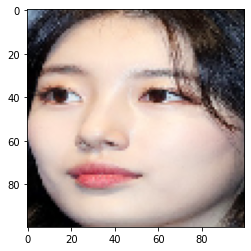

배수지


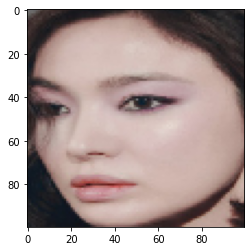

송혜교


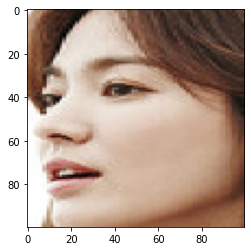

배수지


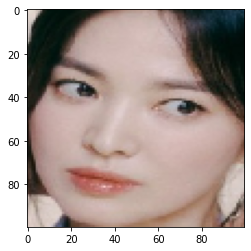

송혜교


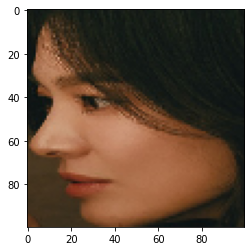

강동원


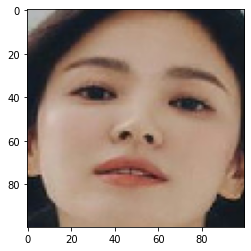

송혜교


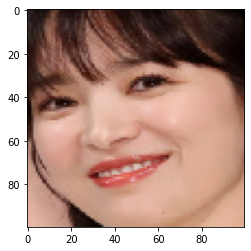

강동원


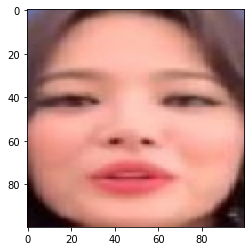

배수지


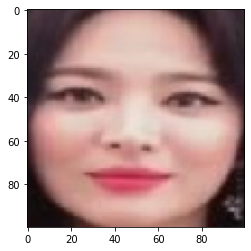

배수지


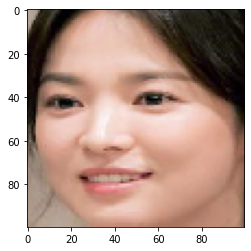

배수지


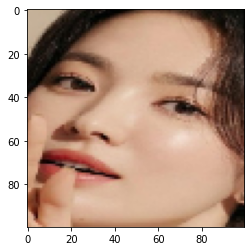

송혜교


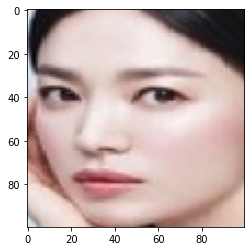

송혜교


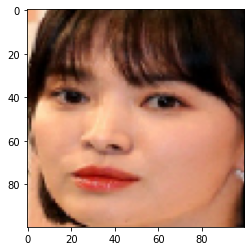

배수지


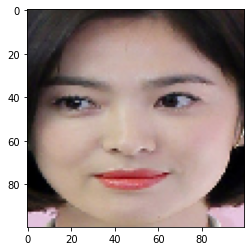

송혜교


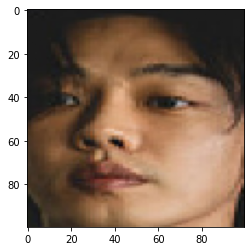

송혜교


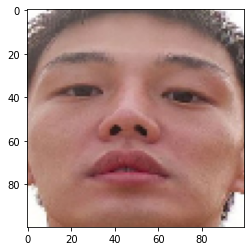

마동석


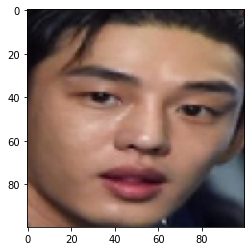

마동석


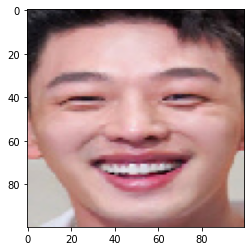

마동석


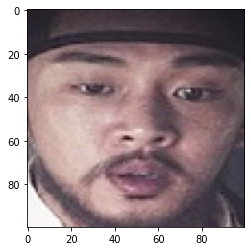

강동원


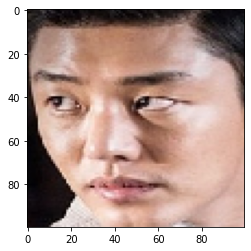

유아인


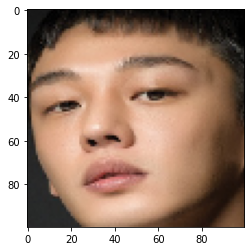

유아인


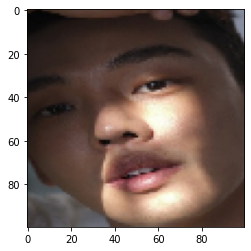

마동석


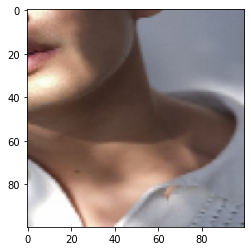

마동석


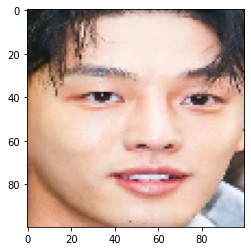

고수


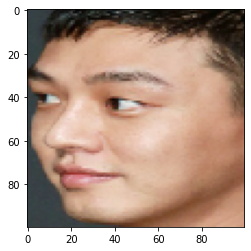

강동원


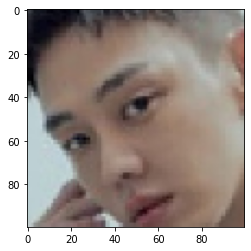

유아인


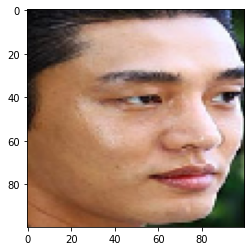

유아인


In [44]:
predic('배수지')                 #이유를 모르겠지만 그냥 이름 적으면 오류 경로 복사로 이름 복사해서 넣어야함 